In [1]:
import numpy as np
import pandas as pd
import missingno as msno

# Oculta warnings do notebook
import warnings
warnings.filterwarnings('ignore')

# Configurações para facilitar a visualização dos dataframes
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

dataset_path = '../data/raw/'
dataset_name = 'PAG_HEI'

df = pd.read_csv(f"{dataset_path}{dataset_name}.csv", sep=',')

In [26]:
# Visualizando informações basicas do dataset
print("df.shape: ", {df.shape})

print("\ndf.info():")
print(df.info())

df.sample(5)

df.shape:  {(9424, 17)}

df.info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9424 entries, 0 to 9423
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SEQN                      9424 non-null   int64  
 1   PAG_MINW                  7150 non-null   float64
 2   ADHERENCE                 7150 non-null   float64
 3   HEI2015C1_TOTALVEG        8549 non-null   float64
 4   HEI2015C2_GREEN_AND_BEAN  8549 non-null   float64
 5   HEI2015C3_TOTALFRUIT      8549 non-null   float64
 6   HEI2015C4_WHOLEFRUIT      8549 non-null   float64
 7   HEI2015C5_WHOLEGRAIN      8549 non-null   float64
 8   HEI2015C6_TOTALDAIRY      8549 non-null   float64
 9   HEI2015C7_TOTPROT         8549 non-null   float64
 10  HEI2015C8_SEAPLANT_PROT   8549 non-null   float64
 11  HEI2015C9_FATTYACID       8549 non-null   float64
 12  HEI2015C10_SODIUM         8549 non-null   float64
 13  HEI2015C11_REFINEDGRAIN   8

,SEQN,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
6298,38055,"1,284.06",3.00,4.07,5.00,0.00,0.00,0.00,3.22,5.00,0.00,4.17,0.00,3.17,7.83,10.00,42.46
4472,36052,715.94,3.00,4.29,4.24,5.00,5.00,3.13,5.00,5.00,5.00,2.44,0.00,10.00,0.00,9.89,59.00
7305,39165,0.00,1.00,0.15,0.00,1.63,3.26,0.00,5.00,5.00,0.00,5.81,2.87,0.00,4.35,10.00,38.06
41,31172,429.56,3.00,1.84,3.78,4.62,0.00,0.00,5.00,3.34,3.83,0.07,8.32,3.70,4.88,3.17,42.56
333,31489,NaN,NaN,0.37,0.00,4.19,5.00,2.24,5.00,1.45,0.28,2.75,9.21,5.28,4.62,0.44,40.84


<AxesSubplot: >

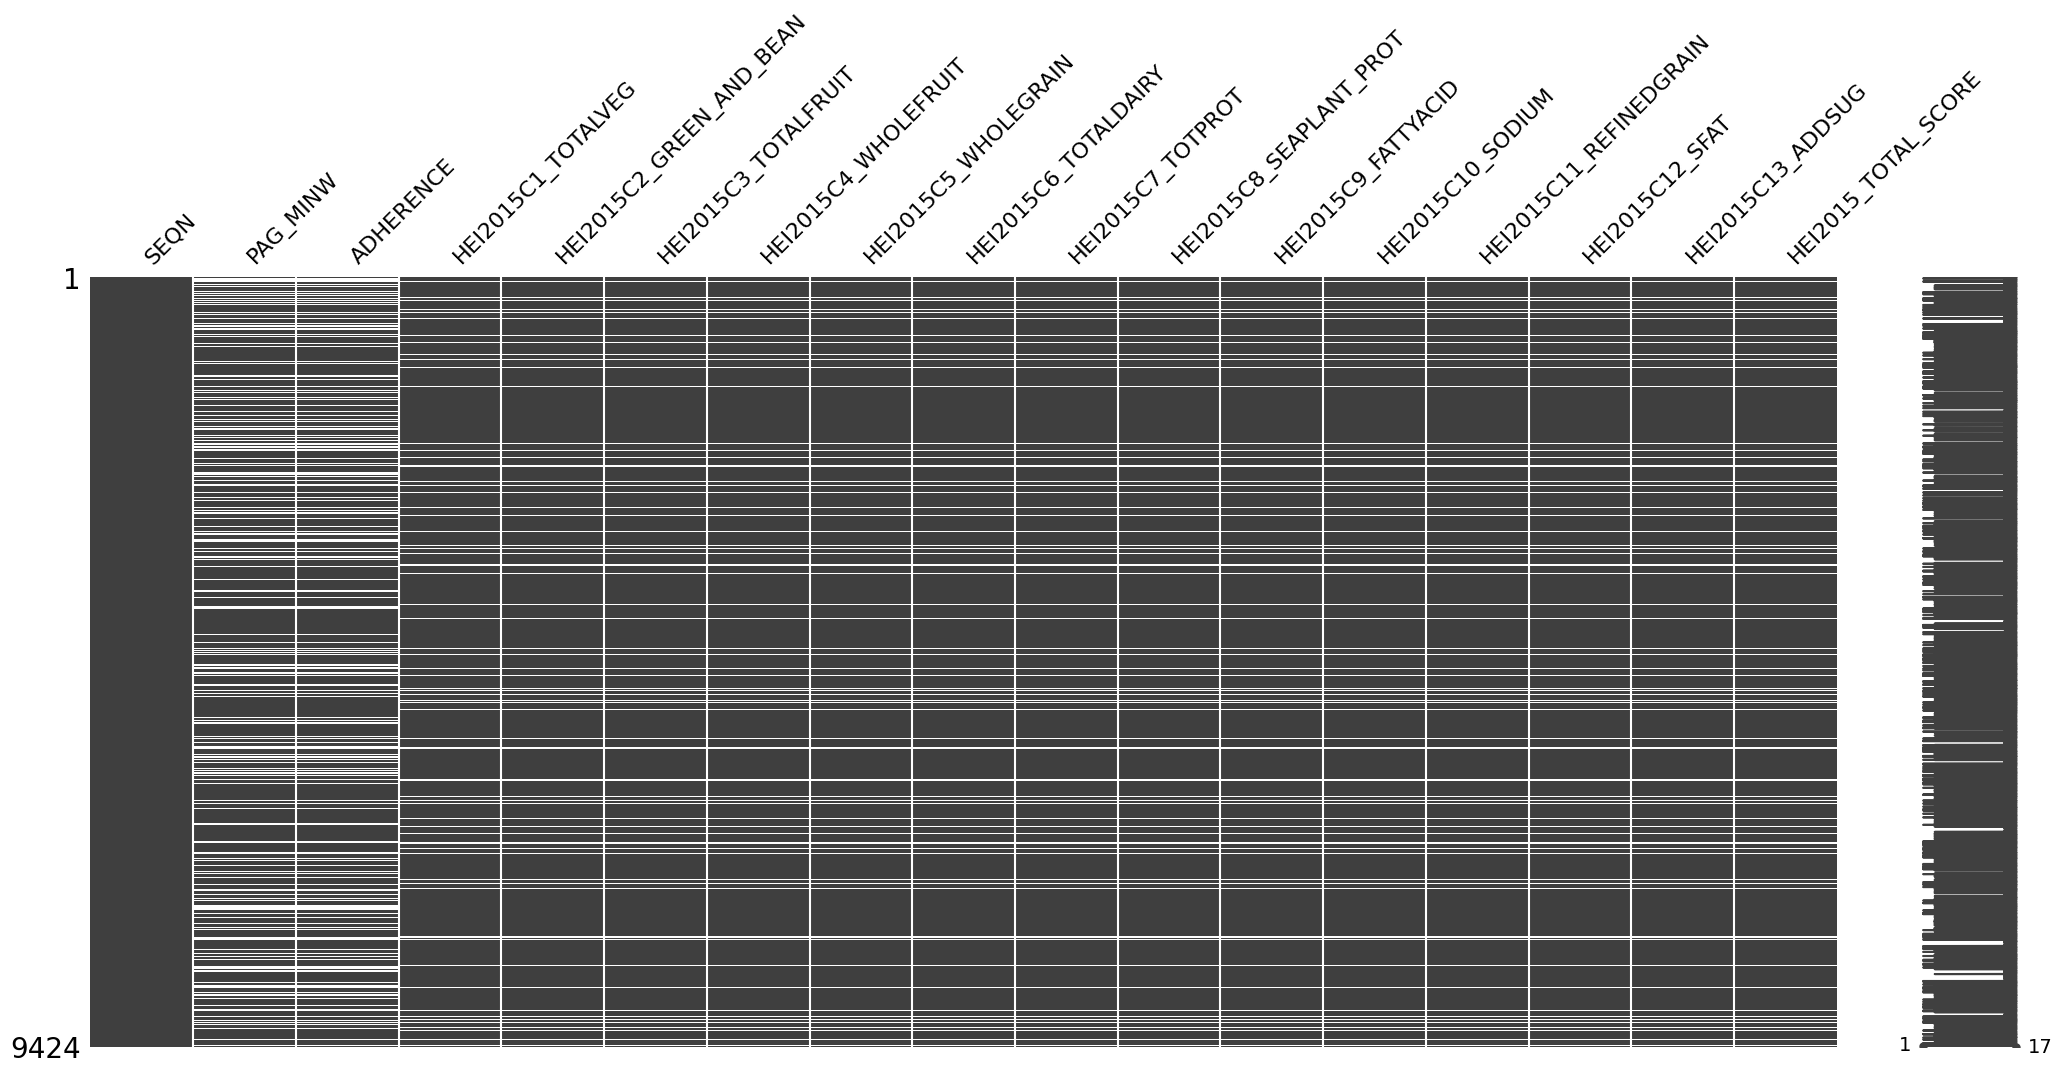

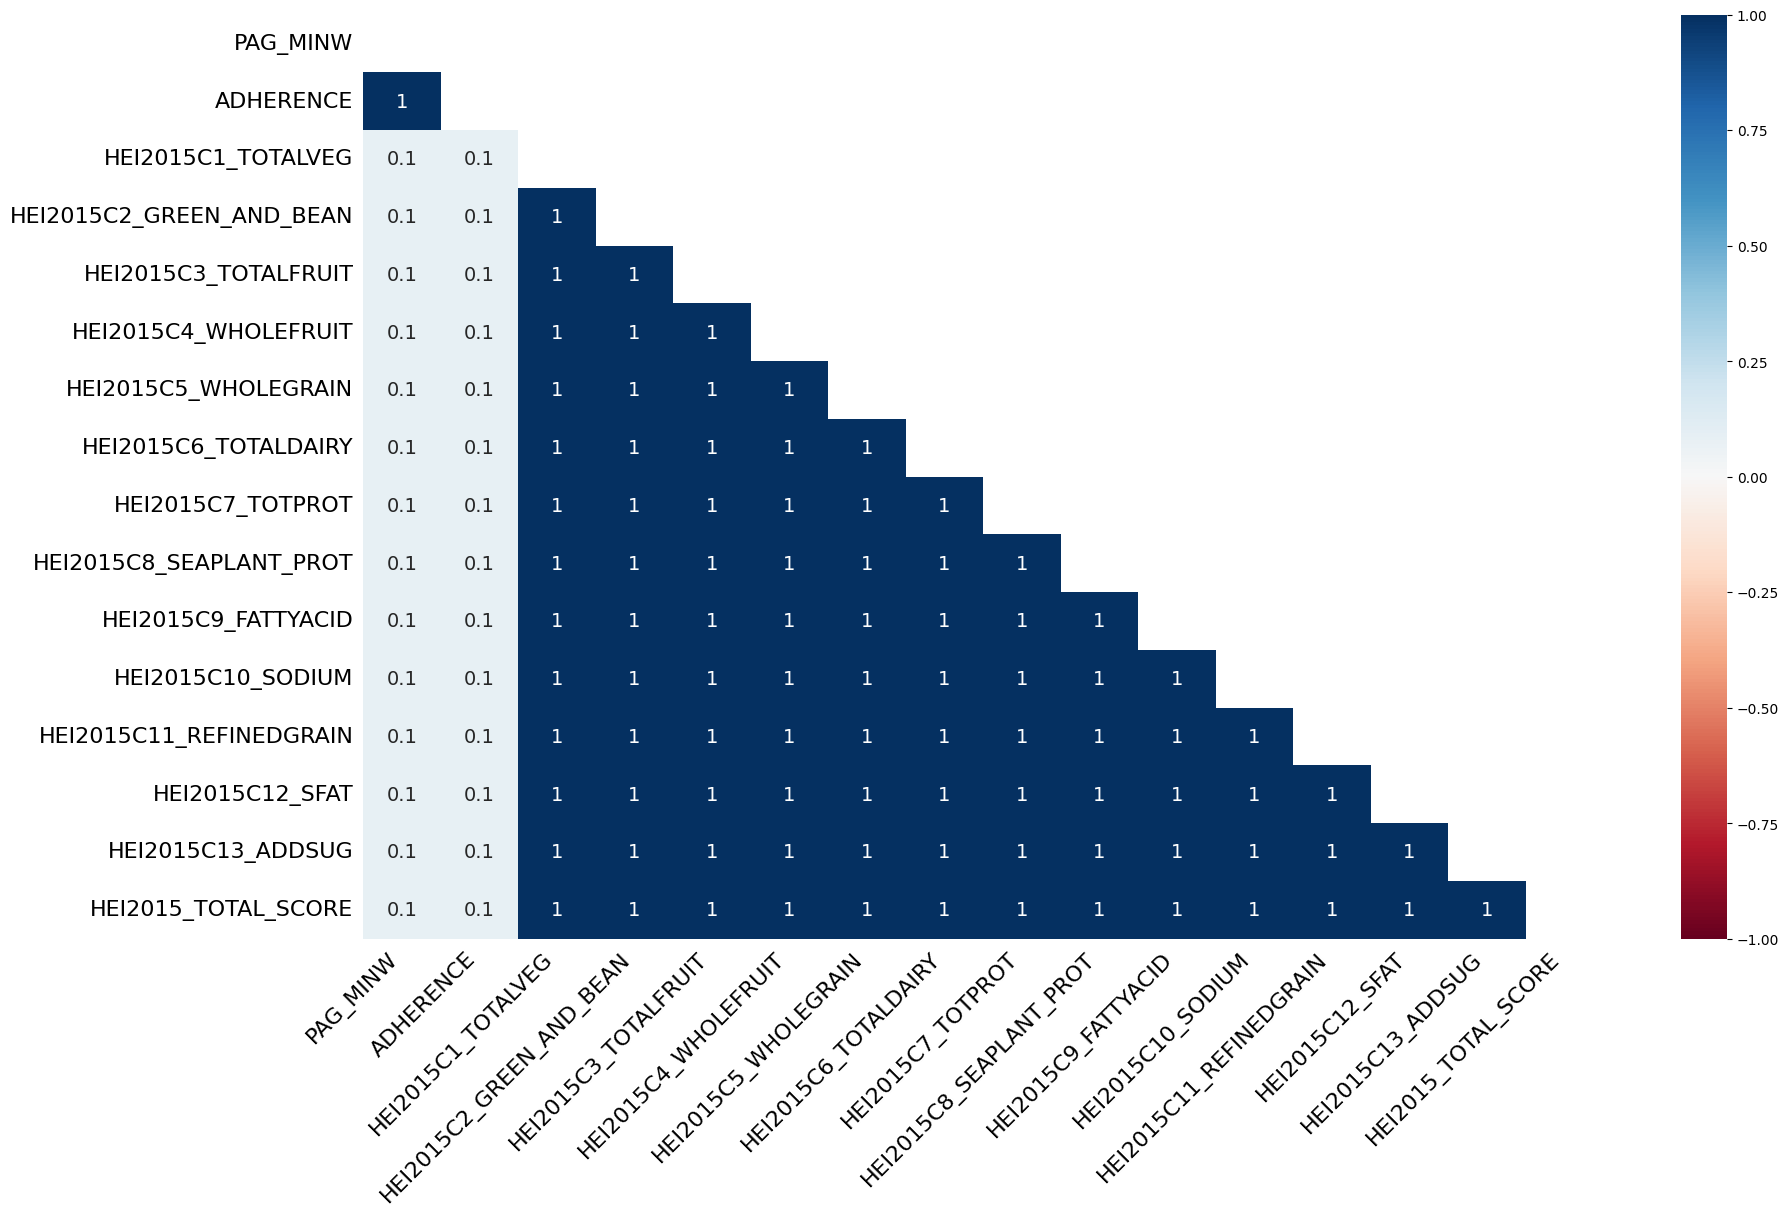

In [3]:
# Verificando ocorrência de valores ausentes
msno.matrix(df)
msno.heatmap(df)

In [25]:
# Visualizando estatísticas das respostas do PAG
pag_cols = ["PAG_MINW", "ADHERENCE"]

df[pag_cols].describe()

,PAG_MINW,ADHERENCE
count,"7,150.00","7,150.00"
mean,565.12,2.07
std,908.84,0.92
min,0.00,1.00
25%,55.43,1.00
50%,256.35,2.00
75%,696.02,3.00
max,"13,801.39",3.00


In [27]:
# Visualizando estatísticas das respostas do HEI
is_hei_column = lambda x: True if x.find("HEI2015") > -1 else False
hei_cols = [col for col in df.columns if is_hei_column(col)]

df[hei_cols].describe()

,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
count,"8,549.00","8,549.00","8,549.00","8,549.00","8,549.00","8,549.00","8,549.00","8,549.00","8,549.00","8,549.00","8,549.00","8,549.00","8,549.00","8,549.00"
mean,2.86,1.55,2.66,2.41,1.67,4.05,4.21,2.33,4.21,4.99,5.54,5.78,5.96,48.22
std,1.47,2.05,1.93,2.15,1.82,1.48,1.16,2.13,3.15,3.29,3.45,3.09,3.22,11.88
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,13.24
25%,1.69,0.00,0.73,0.00,0.00,3.34,3.59,0.00,1.54,2.26,2.65,3.51,3.60,39.64
50%,2.75,0.00,2.62,2.18,1.02,5.00,5.00,1.84,3.79,5.14,5.88,5.98,6.33,47.59
75%,4.17,3.50,5.00,5.00,3.00,5.00,5.00,5.00,6.46,7.71,8.76,8.39,8.86,56.03
max,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,10.00,10.00,10.00,10.00,10.00,89.53
